# Analysis of Concept Drift for Style-Based Fake News Detection Systems


In [1]:
import pandas as pd
from textblob import TextBlob
import numpy as np
from matplotlib import pyplot as plt
import nltk
import statsmodels.api as sm
import profanity_check as prf
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

In [2]:

path = "C:/Users/Katon/Documents/JHU/CreatingAIEnabledSystems/FakeNewsResearch/Data/"

fake = pd.read_csv(path+"ISOT/Fake.csv")
real = pd.read_csv(path+"ISOT/True.csv")
del path

# Clean data
fake.drop(fake.columns.difference(['title', 'text', 'date']), 1, inplace=True)
fake = fake[['date', 'title', 'text']]
fake['date'] = pd.to_datetime(fake['date'], errors='coerce', utc=True)
fake['title'].replace(' ', np.nan, inplace=True)
fake['text'].replace(' ', np.nan, inplace=True)
fake = fake.dropna()

real.drop(real.columns.difference(['title', 'text', 'date']), 1, inplace=True)
real = real[['date', 'title', 'text']]
real['date'] = pd.to_datetime(real['date'], errors='coerce', utc=True)
real['title'].replace(' ', np.nan, inplace=True)
real['text'].replace(' ', np.nan, inplace=True)
real = real.dropna()

In [3]:
# Fake
fakeTitleSubj = np.empty((len(fake), 1))
fakeTextSubj = np.empty((len(fake), 1))

fakeTextPol = np.empty((len(fake), 1))
fakeTitlePol = np.empty((len(fake), 1))

fakeTitleWords = np.empty((len(fake)))
fakeTextWords = np.empty((len(fake), 1))

fakeTitleUnique = np.empty((len(fake), 1))
fakeTextUnique  = np.empty((len(fake), 1))

fakeTitleProf = np.empty((len(fake), 1))
fakeTextProf = np.empty((len(fake), 1))

# Real 
realTitleSubj = np.empty((len(real), 1))
realTextSubj = np.empty((len(real), 1))

realTitlePol = np.empty((len(real), 1))
realTextPol = np.empty((len(real), 1))

realTitleWords = np.empty((len(real), 1))
realTextWords = np.empty((len(real), 1))

realTextUnique  = np.empty((len(real), 1))
realTitleUnique = np.empty((len(real), 1))

realTitleProf = np.empty((len(real), 1))
realTextProf = np.empty((len(real), 1))


for i in range(len(fake)):
    fakeRow = fake.iloc[i,:]
    
    fakeTitle = fakeRow.title
    
    fakeText = fakeRow.text
    
    fakeTitleBlob = TextBlob(fakeTitle)
    fakeTextBlob = TextBlob(fakeText)
    
    fakeTitleSubj[i] = fakeTitleBlob.subjectivity
    fakeTitlePol[i] = fakeTitleBlob.polarity
    fakeTitleWords[i] = len(nltk.word_tokenize(fakeTitle))
    fakeTitleUnique[i] = len(np.unique(nltk.word_tokenize(fakeTitle)))
    fakeTitleProf[i] = prf.predict_prob([fakeTitle])
    
    fakeTextSubj[i] = fakeTextBlob.subjectivity
    fakeTextPol[i] = fakeTextBlob.polarity
    fakeTextWords[i] = len(nltk.word_tokenize(fakeText))
    fakeTextUnique[i] = len(np.unique(nltk.word_tokenize(fakeText)))
    fakeTextProf[i] = prf.predict_prob([fakeText])
    
    if i %1000 == 0:
        print(i),
    
    #Get real news features
    if i < len(real):
        realRow = real.iloc[i,:]
        
        realTitle = realRow.title
        # remove first two words from real['text'] - which are usually CITYNAME, STATE (Reuters)
        realText = realRow.text.split(' ', 3)[3]
        
        realTitleBlob = TextBlob(realTitle)
        realTextBlob = TextBlob(realText)
        
        realTitleSubj[i] = realTitleBlob.subjectivity
        realTitlePol[i] = realTitleBlob.polarity
        realTitleWords[i] = len(nltk.word_tokenize(realTitle))
        realTitleUnique[i] = len(np.unique(nltk.word_tokenize(realTitle)))
        realTitleProf[i] = prf.predict_prob([realTitle])
        
        realTextSubj[i] = realTextBlob.subjectivity
        realTextPol[i] = realTextBlob.polarity
        realTextWords[i] = len(nltk.word_tokenize(realText))
        realTextUnique[i] = len(np.unique(nltk.word_tokenize(realText)))
        realTextProf[i] = prf.predict_prob([realText])
        
# add to dataframe
fake['title_subjectivity'] = fakeTitleSubj
fake['title_polarity'] = np.abs(fakeTitlePol)
fake['title_words'] = fakeTitleWords
fake['title_unique'] = fakeTitleUnique
fake['title_profanity'] = fakeTitleProf

fake['text_subjectivity'] = fakeTextSubj
fake['text_polarity'] = np.abs(fakeTextPol)
fake['text_words'] = fakeTextWords
fake['text_unique'] = fakeTextUnique
fake['text_profanity'] = fakeTextProf


real['title_subjectivity'] = realTitleSubj
real['title_polarity'] = np.abs(realTitlePol)
real['title_words'] = realTitleWords
real['title_unique'] = realTitleUnique
real['title_profanity'] = realTitleProf

real['text_subjectivity'] = realTextSubj
real['text_polarity'] = np.abs(realTextPol)
real['text_words'] = realTextWords
real['text_unique'] = realTextUnique
real['text_profanity'] = realTextProf

fake['date_ordinal'] = pd.to_datetime(fake['date']).apply(lambda date: date.toordinal())
real['date_ordinal'] = pd.to_datetime(real['date']).apply(lambda date: date.toordinal())

# sort by date
fake = fake.sort_values(by='date')
real = real.sort_values(by='date')

fakeDates = sorted(np.unique(fake['date']), reverse=False)
realDates = sorted(np.unique(real['date']), reverse=False)

groupFake = fake.groupby('date').mean()
groupReal = real.groupby('date').mean()

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000


## Results

In [4]:
# test statistics analysis
Results = pd.DataFrame(columns = ["mean", "std_dev", "m", "b", "f_stat", "p_val", "r_squared", "sig_p", "sig_R", "positive_trend"], index=["fake_title_subjectivity", "fake_title_polarity", "fake_title_unique", "fake_title_profanity", "fake_text_subjectivity", "fake_text_polarity", "fake_text_pctunique", "fake_text_profanity", "real_title_subjectivity", "real_title_polarity", "real_title_unique", "real_title_profanity", "real_text_subjectivity", "real_text_polarity", "real_text_pctunique", "real_text_profanity"])

xFake = fake['date_ordinal'].tolist()
xFake = sm.add_constant(xFake)
xReal = real['date_ordinal'].tolist()
xReal = sm.add_constant(xReal)


def GetResults(featureName, isFake):
    
    feat = featureName[5:]
    
    if isFake:
        global fake
        
        if feat == "text_unique":
            col = fake[feat] / fake["text_words"]
        else:
            col = fake[feat]
        dates = fake['date_ordinal']
    else:
        global real
        
        if feat == "text_unique":
            col = real[feat] / real["text_words"]
        else:            
            col = real[feat]
        dates = real['date_ordinal']
        
    
    y = col.tolist()
    X = dates.tolist()
    X = sm.add_constant(X)
    
    results = sm.OLS(y, X).fit()
    m, b = np.polyfit(range(len(dates)), col, 1)
    
    global Results
    Results['mean'][featureName] = np.mean(col)
    Results['std_dev'][featureName] = np.std(col)
    Results['m'][featureName] = m
    Results['b'][featureName] = b
    Results['f_stat'][featureName] = results.fvalue
    Results['p_val'][featureName] = results.f_pvalue
    Results['r_squared'][featureName] = results.rsquared
    Results['sig_p'][featureName] = results.f_pvalue < 0.05
    Results['sig_R'][featureName] = results.rsquared >= 0.65
    Results['positive_trend'][featureName] = m > 0

In [6]:
# Get results
GetResults("fake_title_subjectivity", True)
GetResults("fake_title_polarity", True)
GetResults("fake_title_unique", True)
GetResults("fake_title_profanity", True)
GetResults("fake_text_subjectivity", True)
GetResults("fake_text_polarity", True)
GetResults("fake_text_unique", True)
GetResults("fake_text_profanity", True)

GetResults("real_title_subjectivity", False)
GetResults("real_title_polarity", False)
GetResults("real_title_unique", False)
GetResults("real_title_profanity", False)
GetResults("real_text_subjectivity", False)
GetResults("real_text_polarity", False)
GetResults("real_text_unique", False)
GetResults("real_text_profanity", False)

### Plot Results - KDE Plots

Text(0.5, 0, 'Subjectivity')

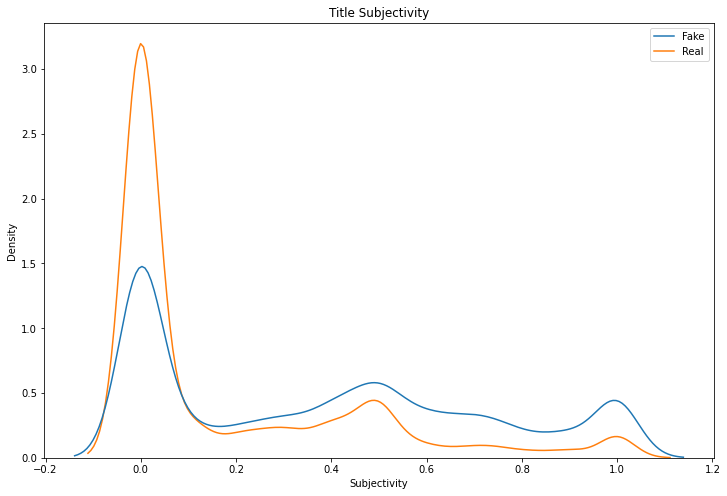

In [8]:
# title subjectivity
fig, ax = plt.subplots(figsize=(12,8))
titleSubjectivity = pd.concat([fake['title_subjectivity'], real['title_subjectivity']], axis=1)
titleSubjectivity.columns = ["Fake", "Real"]
sns.kdeplot(data=titleSubjectivity)
plt.title("Title Subjectivity")
plt.xlabel("Subjectivity")

Text(0.5, 0, 'Polarity')

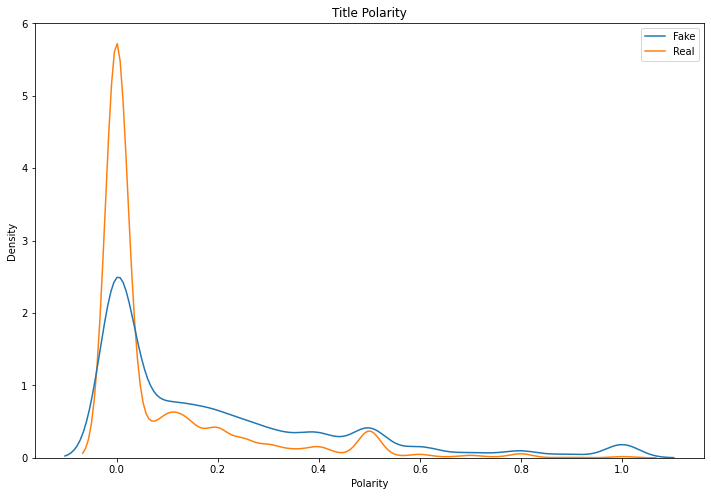

In [10]:
# title polarity
fig, ax = plt.subplots(figsize=(12,8))
titlePolarity = pd.concat([fake['title_polarity'], real['title_polarity']], axis=1)
titlePolarity.columns = ["Fake", "Real"]
sns.kdeplot(data=titlePolarity)
plt.title("Title Polarity")
plt.xlabel("Polarity")

Text(0.5, 0, 'Num Unique')

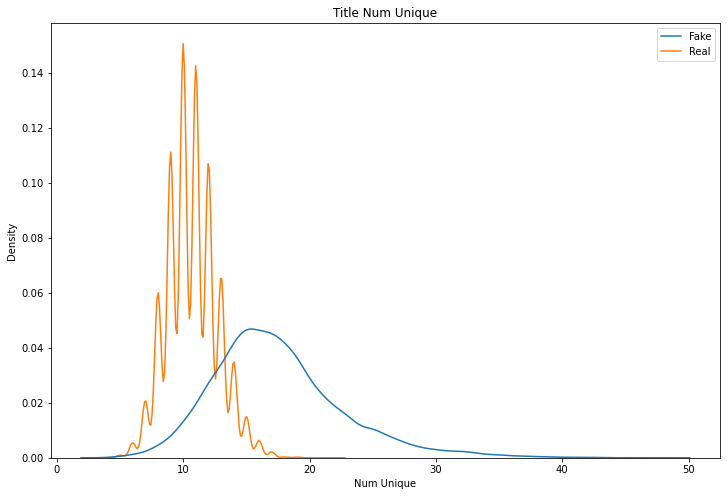

In [11]:
# title unique
fig, ax = plt.subplots(figsize=(12,8))
titleUnique = pd.concat([fake['title_unique'], real['title_unique']], axis=1)
titleUnique.columns = ["Fake", "Real"]
sns.kdeplot(data=titleUnique)
plt.title("Title Num Unique")
plt.xlabel("Num Unique")

Text(0.5, 0, 'Profanity')

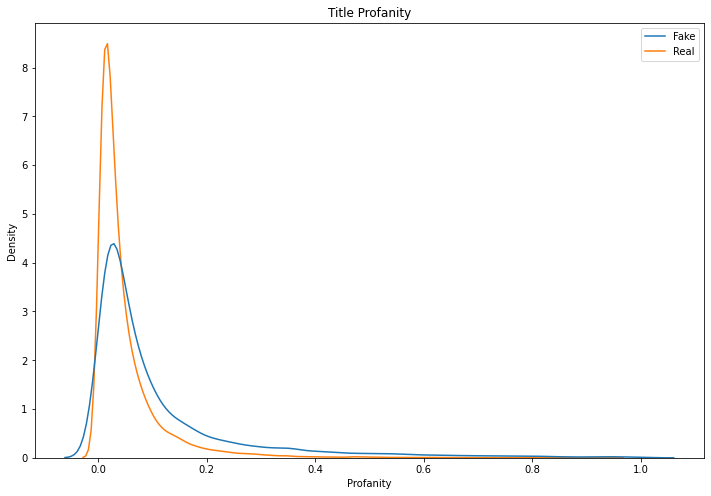

In [12]:
# title profanity
fig, ax = plt.subplots(figsize=(12,8))
titleProfanity = pd.concat([fake['title_profanity'], real['title_profanity']], axis=1)
titleProfanity.columns = ["Fake", "Real"]
sns.kdeplot(data=titleProfanity)
plt.title("Title Profanity")
plt.xlabel("Profanity")

Text(0.5, 0, 'Subjectivity')

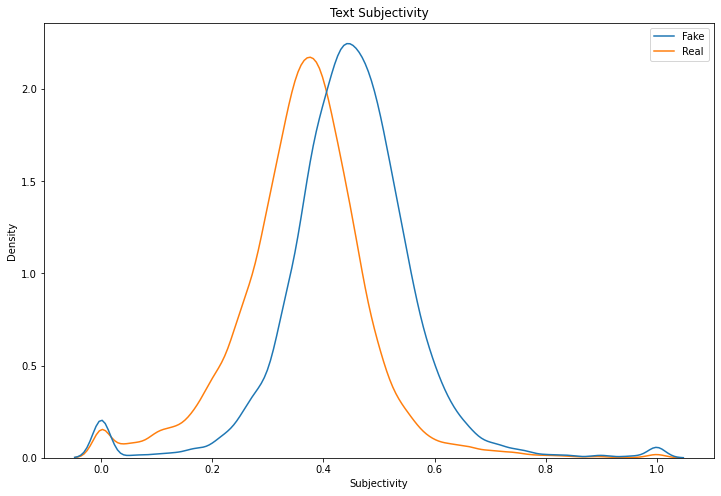

In [13]:
# text subjectivity
fig, ax = plt.subplots(figsize=(12,8))
textSubjectivity = pd.concat([fake['text_subjectivity'], real['text_subjectivity']], axis=1)
textSubjectivity.columns = ["Fake", "Real"]
sns.kdeplot(data=textSubjectivity)
plt.title("Text Subjectivity")
plt.xlabel("Subjectivity")

Text(0.5, 0, 'Polarity')

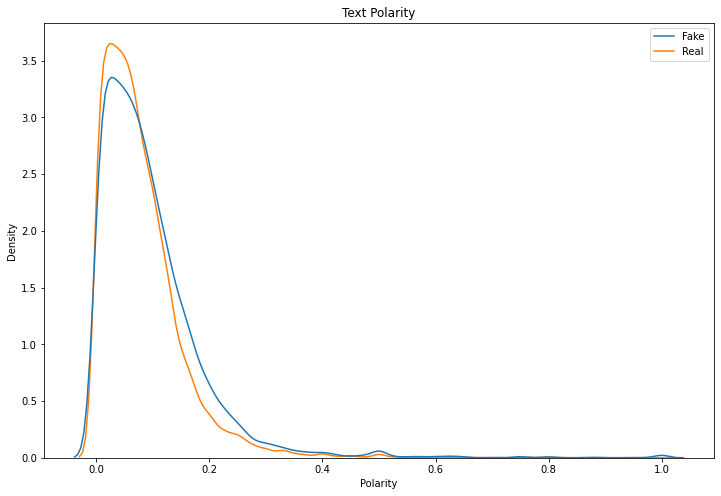

In [14]:
# text polarity
fig, ax = plt.subplots(figsize=(12,8))
textPolarity = pd.concat([fake['text_polarity'], real['text_polarity']], axis=1)
textPolarity.columns = ["Fake", "Real"]
sns.kdeplot(data=textPolarity)
plt.title("Text Polarity")
plt.xlabel("Polarity")

Text(0.5, 0, '% Unique')

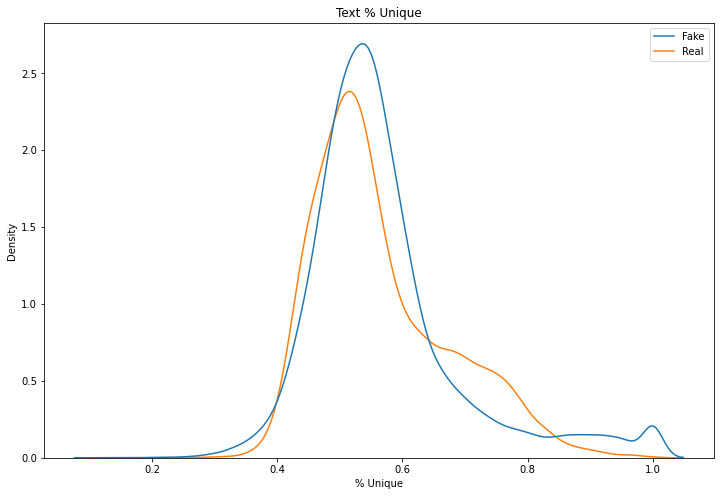

In [15]:
# text pct unique
fig, ax = plt.subplots(figsize=(12,8))
textPctUnique = pd.concat([fake['text_unique'] / fake['text_words'], real['text_unique'] / real['text_words']], axis=1)
textPctUnique.columns = ["Fake", "Real"]
sns.kdeplot(data=textPctUnique)
plt.title("Text % Unique")
plt.xlabel("% Unique")

Text(0.5, 0, 'Profanity')

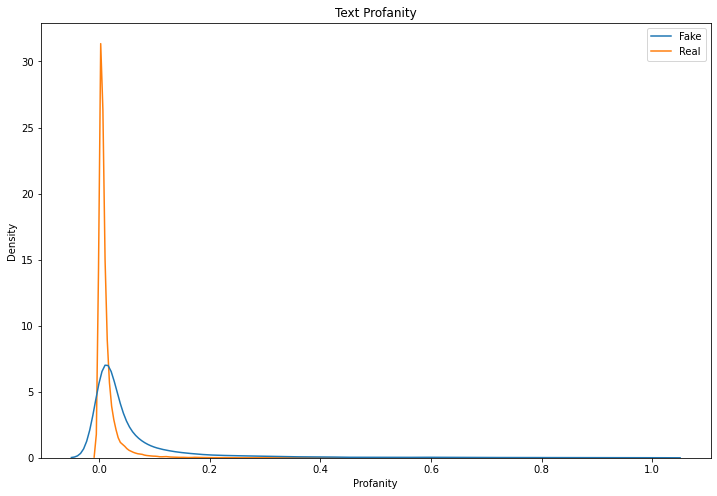

In [16]:
# text profanity
fig, ax = plt.subplots(figsize=(12,8))
textProfanity = pd.concat([fake['text_profanity'], real['text_profanity']], axis=1)
textProfanity.columns = ["Fake", "Real"]
sns.kdeplot(data=textProfanity)
plt.title("Text Profanity")
plt.xlabel("Profanity")

### Plot Results - Scatter plots

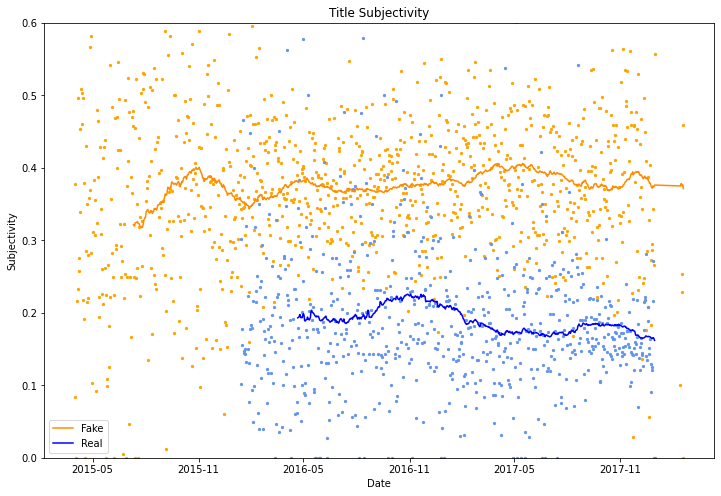

In [28]:
# title subjectivity
fig, ax = plt.subplots(figsize=(12,8))

ax.scatter(fakeDates, groupFake['title_subjectivity'], s=5, c='orange')
ax.scatter(realDates, groupReal['title_subjectivity'], s=5, c='cornflowerblue')

# 100-day moving average
ax.plot(fakeDates, groupFake['title_subjectivity'].rolling(window=100).mean(), c="darkorange")
ax.plot(realDates, groupReal['title_subjectivity'].rolling(window=100).mean(), c="blue")

fmt_half_year = mdates.MonthLocator(interval=6)
ax.xaxis.set_major_locator(fmt_half_year)
ax.set(title="Title Subjectivity", xlabel="Date", ylabel="Subjectivity", ylim=(0,0.6))
ax.legend(["Fake", "Real"])

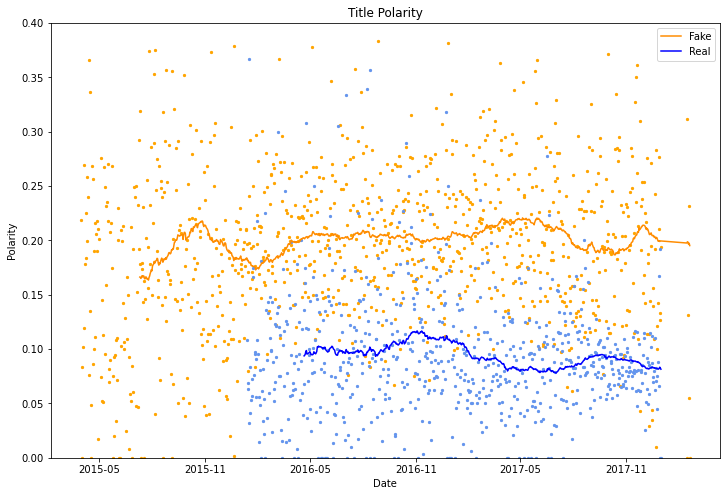

In [29]:
# title polarity
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(fakeDates, groupFake['title_polarity'], s=5, c='orange')
ax.scatter(realDates, groupReal['title_polarity'], s=5, c='cornflowerblue')

# 100-day moving average
ax.plot(fakeDates, groupFake['title_polarity'].rolling(window=100).mean(), c="darkorange")
ax.plot(realDates, groupReal['title_polarity'].rolling(window=100).mean(), c="blue")

fmt_half_year = mdates.MonthLocator(interval=6)
ax.xaxis.set_major_locator(fmt_half_year)
ax.set(title="Title Polarity", xlabel="Date", ylabel="Polarity", ylim=(0,0.4))
ax.legend(["Fake", "Real"])

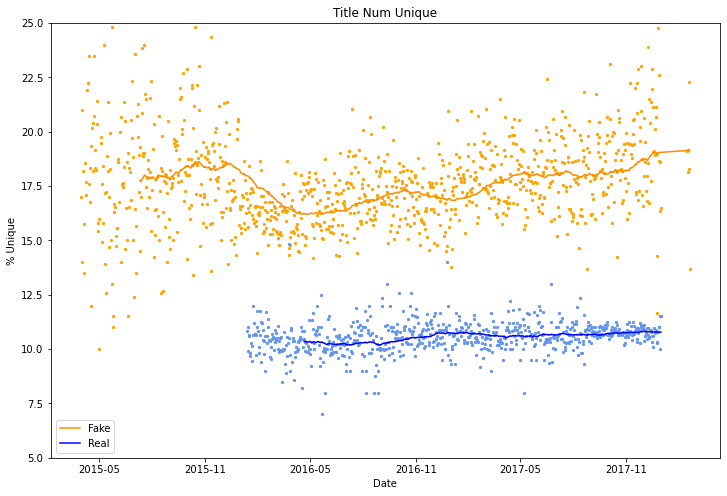

In [30]:
# title unique
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(fakeDates, groupFake['title_unique'], s=5, c='orange')
ax.scatter(realDates, groupReal['title_unique'], s=5, c='cornflowerblue')

# 100-day moving average
ax.plot(fakeDates, (groupFake['title_unique']).rolling(window=100).mean(), c="darkorange")
ax.plot(realDates, (groupReal['title_unique']).rolling(window=100).mean(), c="blue")

fmt_half_year = mdates.MonthLocator(interval=6)
ax.xaxis.set_major_locator(fmt_half_year)
ax.set(title="Title Num Unique", xlabel="Date", ylabel="% Unique", ylim=(5,25))
ax.legend(["Fake", "Real"])

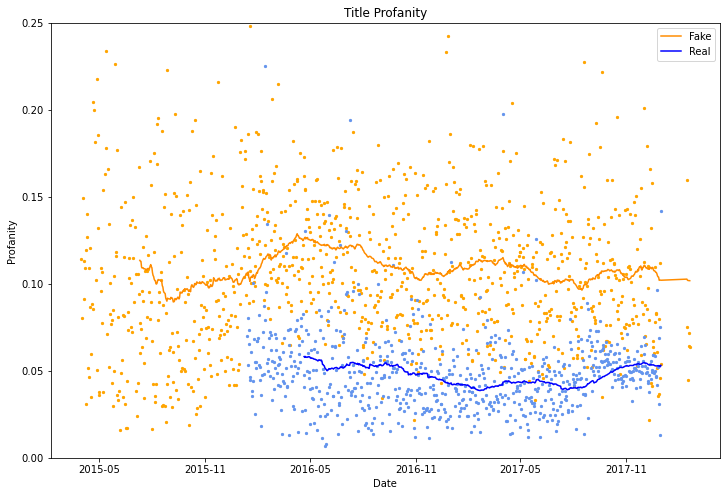

In [31]:
# title profanity
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(fakeDates, groupFake['title_profanity'], s=5, c='orange')
ax.scatter(realDates, groupReal['title_profanity'], s=5, c='cornflowerblue')

# 100-day moving average
ax.plot(fakeDates, groupFake['title_profanity'].rolling(window=100).mean(), c="darkorange")
ax.plot(realDates, groupReal['title_profanity'].rolling(window=100).mean(), c="blue")

fmt_half_year = mdates.MonthLocator(interval=6)
ax.xaxis.set_major_locator(fmt_half_year)
ax.set(title="Title Profanity", xlabel="Date", ylabel="Profanity", ylim=(0,.25))
ax.legend(["Fake", "Real"])

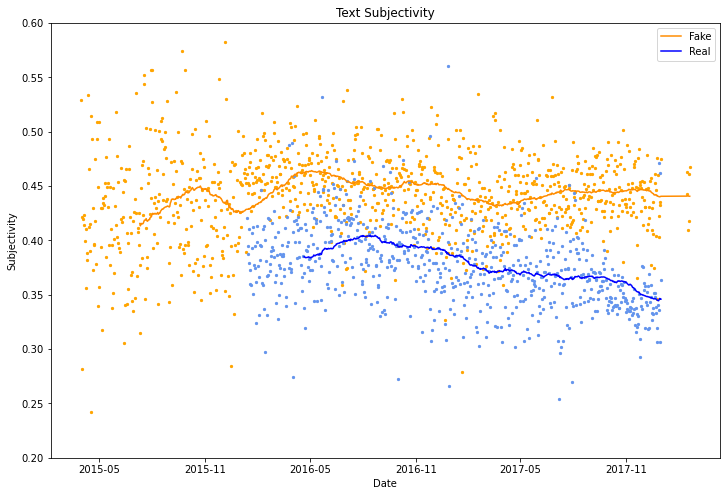

In [32]:
# text subjectivity
fig, ax = plt.subplots(figsize=(12,8))

ax.scatter(fakeDates, groupFake['text_subjectivity'], s=5, c='orange')
ax.scatter(realDates, groupReal['text_subjectivity'], s=5, c='cornflowerblue')

# 100-day moving average
ax.plot(fakeDates, groupFake['text_subjectivity'].rolling(window=100).mean(), c="darkorange")
ax.plot(realDates, groupReal['text_subjectivity'].rolling(window=100).mean(), c="blue")

fmt_half_year = mdates.MonthLocator(interval=6)
ax.xaxis.set_major_locator(fmt_half_year)
ax.set(title="Text Subjectivity", xlabel="Date", ylabel="Subjectivity", ylim=(0.2,0.6))
ax.legend(["Fake", "Real"])

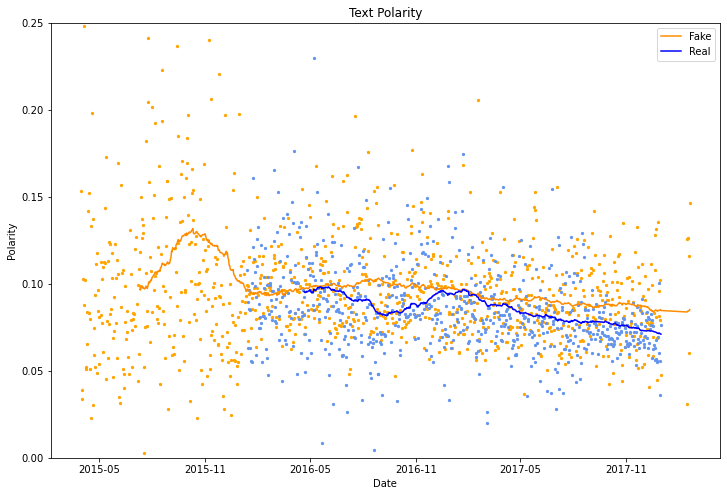

In [33]:
# text polarity
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(fakeDates, groupFake['text_polarity'], s=5, c='orange')
ax.scatter(realDates, groupReal['text_polarity'], s=5, c='cornflowerblue')

# 100-day moving average
ax.plot(fakeDates, groupFake['text_polarity'].rolling(window=100).mean(), c="darkorange")
ax.plot(realDates, groupReal['text_polarity'].rolling(window=100).mean(), c="blue")

fmt_half_year = mdates.MonthLocator(interval=6)
ax.xaxis.set_major_locator(fmt_half_year)
ax.set(title="Text Polarity", xlabel="Date", ylabel="Polarity", ylim=(0,0.25))
ax.legend(["Fake", "Real"])

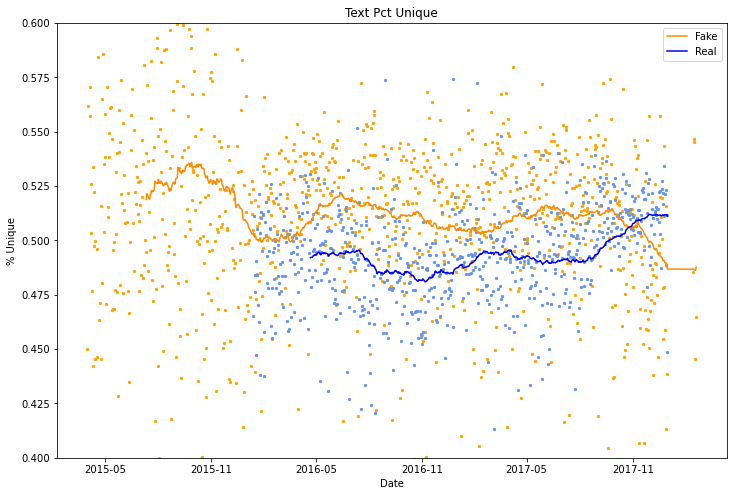

In [34]:
# text pct unique
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(fakeDates, groupFake['text_unique'] / groupFake['text_words'], s=5, c='orange')
ax.scatter(realDates, groupReal['text_unique'] / groupReal['text_words'], s=5, c='cornflowerblue')

# 100-day moving average
ax.plot(fakeDates, (groupFake['text_unique']/groupFake['text_words']).rolling(window=100).mean(), c="darkorange")
ax.plot(realDates, (groupReal['text_unique']/groupReal['text_words']).rolling(window=100).mean(), c="blue")

fmt_half_year = mdates.MonthLocator(interval=6)
ax.xaxis.set_major_locator(fmt_half_year)
ax.set(title="Text Pct Unique", xlabel="Date", ylabel="% Unique", ylim=(0.4,0.6))
ax.legend(["Fake", "Real"])

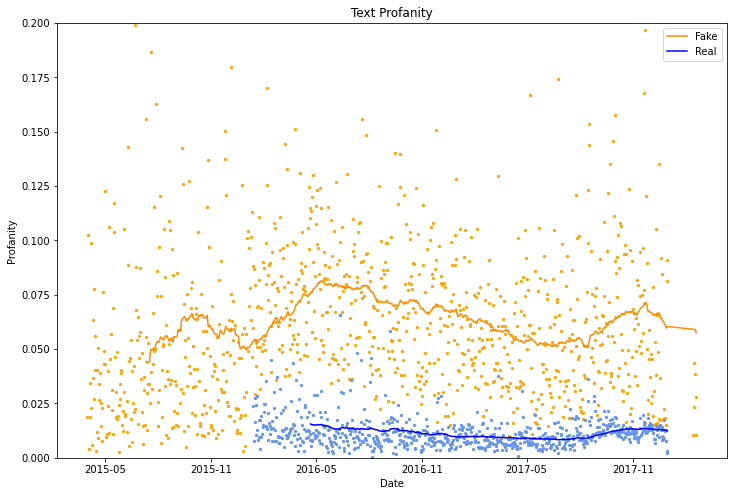

In [35]:
# text profanity
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(fakeDates, groupFake['text_profanity'], s=5, c='orange')
ax.scatter(realDates, groupReal['text_profanity'], s=5, c='cornflowerblue')

# 100-day moving average
ax.plot(fakeDates, groupFake['text_profanity'].rolling(window=100).mean(), c="darkorange")
ax.plot(realDates, groupReal['text_profanity'].rolling(window=100).mean(), c="blue")

fmt_half_year = mdates.MonthLocator(interval=6)
ax.xaxis.set_major_locator(fmt_half_year)
ax.set(title="Text Profanity", xlabel="Date", ylabel="Profanity", ylim=(0,.2))
ax.legend(["Fake", "Real"])

### Results